## Daily Code Workout Day 7(220502)
1. Monty Hall Problem
2. Covid Simulation
3. Covid Data Analysis(<- Here!)
4. Investment Simulation

In [1]:
from statsmodels.formula.api import ols

In [2]:
import pandas as pd
import numpy as np

In [3]:
import random

In [4]:
def rand_asset(sim_len, initial = 50):
    if type(sim_len) not in [int, float] or sim_len == 0:
        sys.exit()
    sim_df, sim_len = pd.DataFrame([]), int(sim_len)
    n_mean, n_std = 0, 0.8
    while len(sim_df.index)< sim_len:
        seed_df = pd.DataFrame(np.random.normal(n_mean, n_std, 
                                                random.sample(range(3, 31), 1)[0])/100 + 1)
        n_mean, n_std = (seed_df[0].mean() - 1)*100 , seed_df[0].std()*100
        seed_df['asset_p'] = initial
        for shift_n in range(len(seed_df.index)):
            seed_df['asset_p'] = seed_df[0].shift(shift_n).fillna(1) * seed_df['asset_p']
        sim_df = pd.concat([sim_df, seed_df[['asset_p']]])
        initial = seed_df['asset_p'].iloc[-1]
    return(sim_df.reset_index(drop = True))

In [5]:
sample_df = pd.DataFrame()
for idx in range(10):
    sample_df = pd.concat([sample_df, rand_asset(50).rename(columns ={"asset_p":idx})], axis =1)
sample_df.plot(figsize = (10, 4))

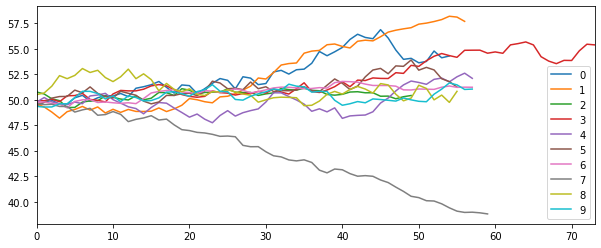

In [6]:
sample_df.plot(figsize = (10, 4))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     13.46
Date:                Mon, 02 May 2022   Prob (F-statistic):           0.000543
Time:                        07:32:07   Log-Likelihood:                -75.545
No. Observations:                  58   AIC:                             155.1
Df Residuals:                      56   BIC:                             159.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.673e-14      0.119   2.25e-13      1.000      -0.238       0.238
x              0.4403      0.120      3.669      0.001       0.200       0.681
==============================================================================
Omnibus:                        7.625   Durbin-Watson:                   0.035
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                4.500
Skew:                          -0.499   Prob(JB):                        0.105
Kurtosis:                       2.069   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

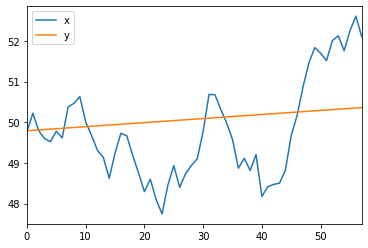

In [7]:
ols_df = sample_df[[4]].copy().dropna()
ols_df[5] = pd.Series([sample_df[4].mean() + x/100 for x in range(ols_df.shape[0])])
ols_df.columns = ['x', 'y']
ols_df.plot()

model = ols(formula="y ~ x", data = ols_df.apply(lambda x: (x - x.mean())/x.std())).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.171
Date:                Mon, 02 May 2022   Prob (F-statistic):              0.284
Time:                        07:32:33   Log-Likelihood:                -79.775
No. Observations:                  57   AIC:                             163.5
Df Residuals:                      55   BIC:                             167.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0001      0.132     -0.001      0.999      -0.265       0.265
x              0.1444      0.133      1.082      0.284      -0.123       0.412
==============================================================================
Omnibus:                       14.790   Durbin-Watson:                   2.796
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               10.887
Skew:                           0.944   Prob(JB):                      0.00433
Kurtosis:                       1.990   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

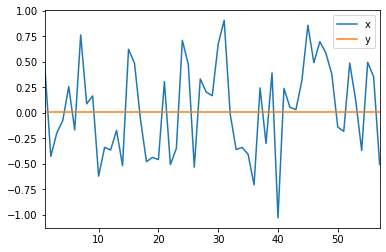

In [8]:
ols_df = sample_df[[4]].copy().dropna()
ols_df[5] = pd.Series([sample_df[4].mean() + x/100 for x in range(ols_df.shape[0])])
ols_df = ols_df.diff(1).dropna()
ols_df.columns = ['x', 'y']
ols_df.plot()

model = ols(formula="y ~ x", data = ols_df.apply(lambda x: (x - x.mean())/x.std())).fit()
model.summary()